In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-capacity/LungCap.xls


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 312.5 kB/s eta 0:00:00a 0:00:01


In [5]:
data = pd.read_excel('/kaggle/input/lung-capacity/LungCap.xls')

In [6]:
# lets check the effect of independant variables on dependant variable
# here lung capacity is dependant variable and all other variables are the independant variables
# lets use linear regression to analyse the effect of features on target variable

data.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LungCap(cc)     725 non-null    float64
 1   Age( years)     725 non-null    int64  
 2   Height(inches)  725 non-null    float64
 3   Smoke           725 non-null    object 
 4   Gender          725 non-null    object 
 5   Caesarean       725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [10]:
# checking for the null values

data.isna().sum()

LungCap(cc)       0
Age( years)       0
Height(inches)    0
Smoke             0
Gender            0
Caesarean         0
dtype: int64

In [17]:
#changing the names of columns and rearranging the columns at convenient order

data[['LungCap','Age','Height']] = data[['LungCap(cc)','Age( years)','Height(inches)']]
data.drop(['LungCap(cc)','Age( years)','Height(inches)'], axis=1, inplace=True)
cols = data.columns.to_list()
cols = cols[3:] + cols[0:3]
data = data[cols]
data.head()

In [54]:
data.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


# 

In [80]:
# lets look for the categorical variables and convert them into numerical values

data=pd.get_dummies(data, drop_first = True)

In [81]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size=0.8, random_state=0)
print('size of data before: '+ str(data.shape[0]))
print('train data size: '+ str(data_train.shape[0]))
print('test data size: '+ str(data_test.shape[0]))

size of data before: 725
train data size: 580
test data size: 145


In [82]:
data_train_x = data_train.iloc[:,1:]
data_train_y = data_train.iloc[:,0]
data_test_x = data_test.iloc[:,1:]
data_test_y = data_test.iloc[:,0]

In [84]:
# building model using sklearn's linearregression

from sklearn.linear_model import LinearRegression  # importing the class
linreg = LinearRegression() # initiating the instance
linreg.fit(data_train_x, data_train_y) # building the model
 

LinearRegression()

In [87]:
# building model using statsmodel

import statsmodels.api as sm
data_train_x0 = sm.add_constant(data_train_x)
linregg = sm.OLS(data_train_y, data_train_x0).fit()
linregg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LungCap   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     678.4
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          3.45e-238
Time:                        15:08:53   Log-Likelihood:                -829.45
No. Observations:                 580   AIC:                             1671.
Df Residuals:                     574   BIC:                             1697.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.5975      0.525    -20.183      0.000     -11.629      -9.566
Age               0.1974      0.020      9.794      0.000       0.158       0.237
Height            0.2452      0.011     21.847      0.000       0.223       0.267
Smoke_yes        -0.5529      0.147     -3.755      0.000      -0.842      -0.264
Gender_male       0.4197      0.089      4.735      0.000       0.246       0.594
Caesarean_yes    -0.1541      0.101     -1.526      0.127      -0.352       0.044
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.940
Skew:                          -0.046   Prob(JB):                        0.625
Kurtosis:                       2.825   Cond. No.                         828.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# since the effect of Caesarean_yes column is not statistically significant on the target variable
# as p value is greater than significance level, so we can eliminate this variable to mitigate the
# overfitting scenario

#data.drop('Caesarean_yes', axis=1, inplace=True)



data_train, data_test = train_test_split(data, train_size=0.8, random_state=0)
print('size of data before: '+ str(data.shape[0]))
print('train data size: '+ str(data_train.shape[0]))
print('test data size: '+ str(data_test.shape[0]))
data_train_x = data_train.iloc[:,1:]
data_train_y = data_train.iloc[:,0]
data_test_x = data_test.iloc[:,1:]
data_test_y = data_test.iloc[:,0]


size of data before: 725
train data size: 580
test data size: 145


In [115]:
data_train_x0 = sm.add_constant(data_train_x)
linregg = sm.OLS(data_train_y, data_train_x0).fit()
linregg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LungCap   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          3.56e-239
Time:                        15:31:32   Log-Likelihood:                -830.62
No. Observations:                 580   AIC:                             1671.
Df Residuals:                     575   BIC:                             1693.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -10.5902      0.526    -20.147      0.000     -11.623      -9.558
Age             0.1982      0.020      9.823      0.000       0.159       0.238
Height          0.2445      0.011     21.776      0.000       0.222       0.267
Smoke_yes      -0.5705      0.147     -3.881      0.000      -0.859      -0.282
Gender_male     0.4166      0.089      4.696      0.000       0.242       0.591
==============================================================================
Omnibus:                        0.569   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.674
Skew:                          -0.040   Prob(JB):                        0.714
Kurtosis:                       2.853   Cond. No.                         828.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
from sklearn.linear_model import LinearRegression  # importing the class
linreg = LinearRegression() # initiating the instance
linreg.fit(data_train_x, data_train_y) # building the model

LinearRegression()

In [117]:
prdct_train = linreg.predict(data_train_x)
prdct_test = linreg.predict(data_test_x)

In [118]:
error_train = data_train_y - prdct_train
error_test = data_test_y - prdct_test

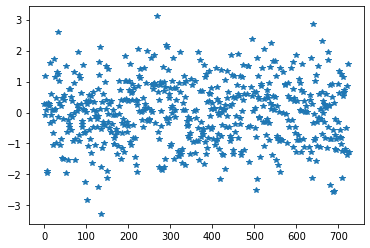

In [119]:
plt.plot(error_train,'*')

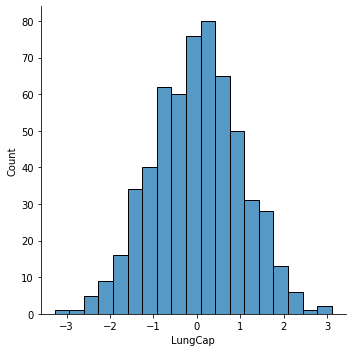

In [120]:
sns.displot(error_train)